In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import DateOffset


In [2]:
df = pd.read_csv('BTC.csv',parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,APrice
0,2010-07-16,0.04951,0.04951,0.04951,0.04951,0.04951,0,0.049510
1,2010-07-17,0.04951,0.08585,0.05941,0.08584,0.08584,5,0.067675
2,2010-07-18,0.08584,0.09307,0.07723,0.08080,0.08080,49,0.083320
3,2010-07-19,0.08080,0.08181,0.07426,0.07474,0.07474,20,0.077770
4,2010-07-20,0.07474,0.07921,0.06634,0.07921,0.07921,42,0.076975


In [3]:
# import pandas_profiling

# pandas_profiling.ProfileReport(df)

In [4]:
# profile = pandas_profiling.ProfileReport(df)
# profile.to_file(outputfile="Titanic data profiling.html")

In [5]:
df1=df.drop(columns=['Open','High','Low','Close','Adj Close','Volume'])
df1.tail()

,Date,APrice
3250,2019-06-09,7832.219971
3251,2019-06-10,7969.159912
3252,2019-06-11,8045.729981
3253,2019-06-12,8204.855225
3254,2019-06-13,8464.495118


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255 entries, 0 to 3254
Data columns (total 2 columns):
Date       3255 non-null datetime64[ns]
APrice     3255 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 50.9 KB


In [7]:
df2 = df1.set_index('Date')
df2.index

DatetimeIndex(['2010-07-16', '2010-07-17', '2010-07-18', '2010-07-19',
               '2010-07-20', '2010-07-21', '2010-07-22', '2010-07-23',
               '2010-07-24', '2010-07-25',
               ...
               '2019-06-04', '2019-06-05', '2019-06-06', '2019-06-07',
               '2019-06-08', '2019-06-09', '2019-06-10', '2019-06-11',
               '2019-06-12', '2019-06-13'],
              dtype='datetime64[ns]', name='Date', length=3255, freq=None)

In [8]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
import pandas as pd
import numpy as np
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
print(__version__)
init_notebook_mode(connected=True)
cf.go_offline()

3.10.0


In [9]:
plotly.__version__

'3.10.0'

In [10]:
cf.__version__

'0.15'

In [11]:
df= df2.resample('D').mean()

In [12]:
df.describe().transpose

<bound method DataFrame.transpose of             APrice 
count   3246.000000
mean    1725.106905
std     3024.586024
min        0.049510
25%       13.275000
50%      374.845001
75%     1177.093735
max    19206.155270>

In [13]:

df.iplot()


In [14]:
timeseries = df['APrice '].dropna()


In [15]:
type(timeseries)

pandas.core.series.Series

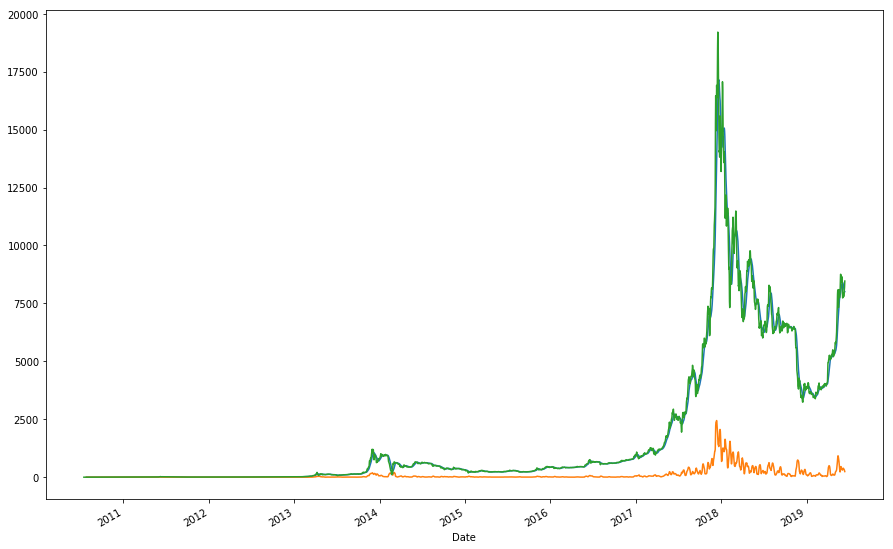

In [16]:
timeseries.rolling(12).mean().plot(label='12 months data')
timeseries.rolling(12).std().plot(label='12 months data')

timeseries.plot(figsize=(15,10))

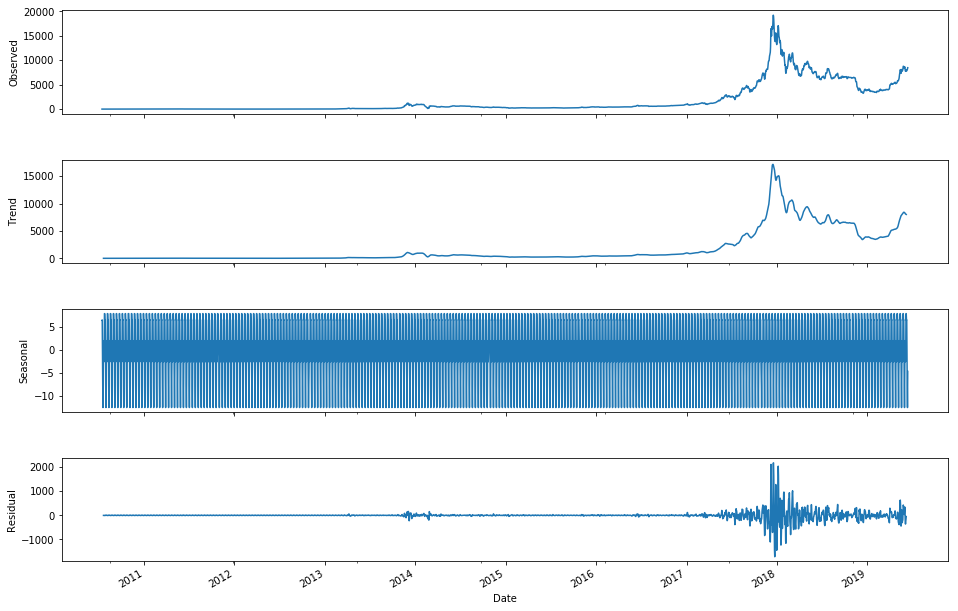

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp= seasonal_decompose(timeseries,freq=12)  
fig=decomp.plot()
fig.set_size_inches(15,10)


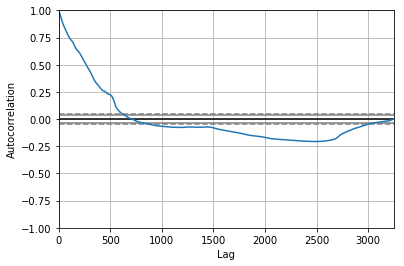

In [18]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(timeseries)
plt.show()

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
result=adfuller(timeseries.dropna())

In [21]:
result

(-1.229896459321088,
 0.660604636962134,
 28,
 3217,
 {'1%': -3.4323843567237304,
  '5%': -2.862438856077707,
  '10%': -2.5672484809368243},
 38103.61739809379)

In [22]:
from statsmodels.tsa.stattools import adfuller
def adf_check(time_series):
    result=adfuller(time_series)
    print("Augumented DF Test")
    labels=['ADF Test Statistics','p-value','# of lags','no of observation used']
    for value,label in zip(result,labels):
        print(label+":"+str(value))
    if result[1]<=0.05:
        print("Strong evidence against null hypotheis ")
        print("reject null hpyothesis")
        print("data has no unit root annd is stationary")
    else:
        print("Weak evidence against null hypotheis ")
        print("Fail to reject null hpyothesis")
        print("data has no unit root annd is stationary")

In [23]:
adf_check(timeseries)

Augumented DF Test
ADF Test Statistics:-1.229896459321088
p-value:0.660604636962134
# of lags:28
no of observation used:3217
Weak evidence against null hypotheis 
Fail to reject null hpyothesis
data has no unit root annd is stationary


In [24]:
df['First Difference']=df['APrice ']-df['APrice '].shift(1)

In [25]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,8

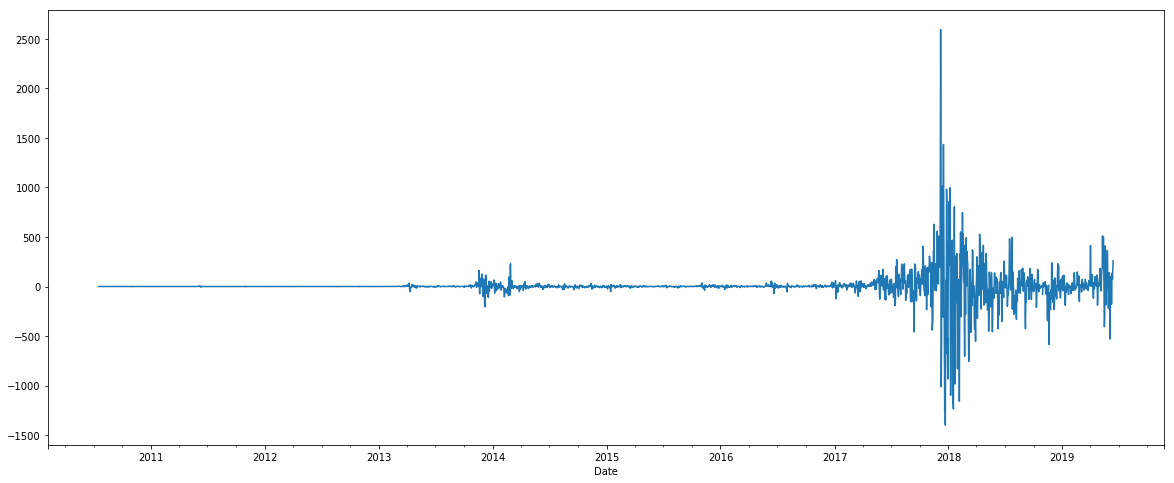

In [26]:
df['First Difference'].plot()

In [27]:
adf_check(df['First Difference'].dropna())

Augumented DF Test
ADF Test Statistics:-11.030674606608892
p-value:5.678776446487974e-20
# of lags:27
no of observation used:3208
Strong evidence against null hypotheis 
reject null hpyothesis
data has no unit root annd is stationary


In [28]:
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams['figure.figsize'] = (20, 10)


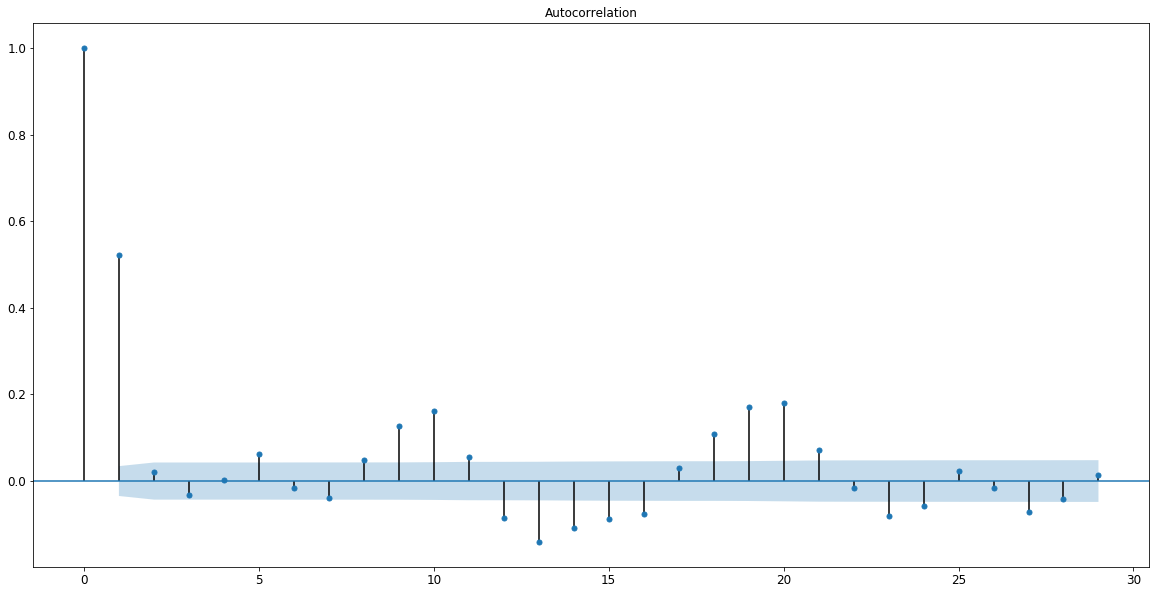

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig_first=plot_acf(df['First Difference'].dropna(),lags=29)


In [30]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# fig_first=plot_pacf(df['First Difference'].dropna())


In [31]:
from pandas.plotting import autocorrelation_plot

In [32]:
from statsmodels.tsa.arima_model import ARIMA

In [33]:
y=df

In [34]:
# # Initial approximation of parameters
# from itertools import product
# import warnings
# import statsmodels.api as sm

# Qs = range(0, 2)
# qs = range(0, 3)
# Ps = range(0, 3)
# ps = range(0, 3)
# D=1
# d=1
# parameters = product(ps, qs, Ps, Qs)
# parameters_list = list(parameters)
# len(parameters_list)

# # Model Selection
# results = []
# best_aic = float("inf")
# warnings.filterwarnings('ignore')
# for param in parameters_list:
#     try:
#         model=sm.tsa.statespace.SARIMAX(df['APrice '], order=(param[0], d, param[1]), 
#                                         seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
#     except ValueError:
#         print('wrong parameters:', param)
#         continue
#     aic = model.aic
#     if aic < best_aic:
#         best_model = model
#         best_aic = aic
#         best_param = param
#     results.append([param, model.aic])

In [35]:
# # Best Models
# result_table = pd.DataFrame(results)
# result_table.columns = ['parameters', 'aic']
# print(result_table.sort_values(by = 'aic', ascending=True).head())
# print(best_model.summary())

In [39]:
from pmdarima import auto_arima

stepwise_model = auto_arima(df['APrice '].dropna(), start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=False,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1); AIC=38775.857, BIC=38800.196, Fit time=2.068 seconds
Fit ARIMA: order=(0, 1, 0); AIC=41142.361, BIC=41154.531, Fit time=0.016 seconds
Fit ARIMA: order=(1, 1, 0); AIC=40105.894, BIC=40124.149, Fit time=0.100 seconds
Fit ARIMA: order=(0, 1, 1); AIC=38783.733, BIC=38801.988, Fit time=0.323 seconds
Fit ARIMA: order=(2, 1, 1); AIC=38777.599, BIC=38808.024, Fit time=1.908 seconds
Fit ARIMA: order=(1, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2); AIC=38779.495, BIC=38816.004, Fit time=2.337 seconds
Total fit time: 7.307 seconds
38775.85675035183


In [40]:
import statsmodels.api as sm


In [41]:
print(stepwise_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 3245
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -19383.928
Method:                       css-mle   S.D. of innovations             95.013
Date:                Tue, 02 Jul 2019   AIC                          38775.857
Time:                        20:40:03   BIC                          38800.196
Sample:                             1   HQIC                         38784.577
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6744      3.499      0.764      0.445      -4.184       9.533
ar.L1.D.y      0.0557      0.018      3.146      0.002       0.021       0.090
ma.L1.D.y      0.9814      0.003    363.631      0.0

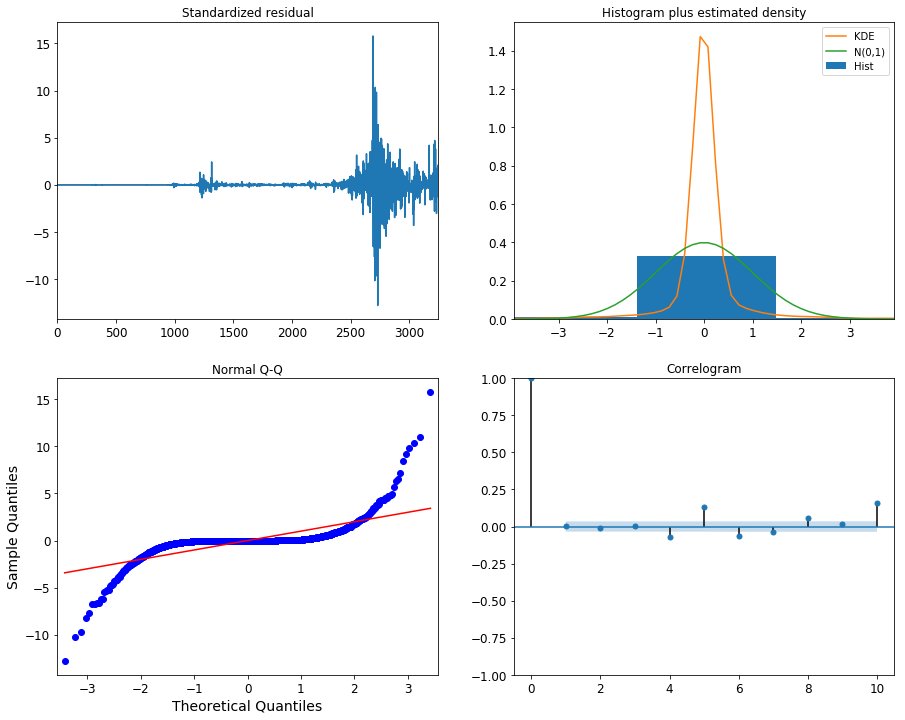

In [43]:
stepwise_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
# import pickle
# with open('model.pickle', 'wb') as f:
#     pickle.dump(results, f)

In [55]:
model = ARIMA(df['APrice '], order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)

MissingDataError: exog contains inf or nans

In [52]:
df['Forecast']=stepwise_model.predict(n_periods=3255)
df[['APrice ','Forecast']].iplot()

In [53]:
df.tail()

,APrice,First Difference,Forecast
Date,,,
2019-06-09,7832.219971,43.610108,17376.976157
2019-06-10,7969.159912,136.939941,17379.650604
2019-06-11,8045.729981,76.570069,17382.325050
2019-06-12,8204.855225,159.125244,17384.999496
2019-06-13,8464.495118,259.639893,17387.673943


In [ ]:

# y_forecasted = df['Forecast']
# y_truth = df['APrice ']
# # Compute the mean square error
# mse = ((y_forecasted - y_truth) ** 2).mean()
# print('The Mean Squared Error of our forecasts is {}'.format(mse, 2)))
# print('The Mean Squared Error of our forecasts is {}'.format(np.sqrt(mse, 2)))


In [ ]:
# saved_model = pickle.dumps(results)


In [ ]:
# clf_from_pickle = pickle.loads(saved_model)
# a=clf_from_pickle.predict(start=110,end=150)
# a.to_json("picletest.json",date_format='iso',orient='index')

In [ ]:
df['Forecast']=results.predict(start='2019-6-11',end='2021-6-15')
df


In [ ]:
from pandas.tseries.offsets import DateOffset

future_dates=[df.index[-1]+DateOffset(days=x) for x in range(1,365)]
future_dates

In [ ]:
future_df=pd.DataFrame(index=future_dates,columns=df.columns)
future_df

In [ ]:
final_df=pd.concat([df,future_df],axis=0)
final_df

In [ ]:
final_df['Forecast']=results.predict(start='2019-6-11',end='2021-8-20',freq='D')
final_df


In [ ]:
final_df.to_excel("forecast_excel.xlsx")

In [ ]:
final_df['APrice '].iplot()
final_df['Forecast'].iplot()


In [ ]:
a.to_json('pred.json',date_format='iso',orient='table')